# Start of Project

Problem scenario : There is a bank and it wants to do selective marketing for loans inorder to save resources in advertising. For this they need a Machine learning model to analyse the data and predict whether a person will be taking loan or not. The bank has a databse of 5000 people for training and testing the ML model which contains information of their clients including their age, income, experience, personal loan, credit card usage, etc.

Note :

1.   This is a Binary Logistic Regression Problem.
2.   The data set was originally taken from kaggle, but I have converted the .xlsx file into a .csv file and uploaded it in the same drive folder as this notebook
3.   In the data set, '1' stands for yes and '0' stands for no. As in if in personal loan section of a person is 1, that means he took loan.


 

 # 1. Importing the libraries 



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


from google.colab import files        # Uploading dataframe
uploaded = files.upload()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving datafile.csv to datafile.csv


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
    name=fn, length=len(uploaded[fn])))                   # Savinf dataframe with name, format and length

User uploaded file "datafile.csv" with length 206600 bytes


In [ ]:
import io
df=pd.read_csv(io.BytesIO(uploaded['datafile.csv']))  # storing the dataset in the variable df

In [ ]:
df.head(5) # Checking top 5 rows

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.tail(5) # checking bottom 5 rows


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
#checking missing or null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
#summary of data, ie., mean, median, mode &quartile
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# 2. Checking and clearing data

In [ ]:
#check how many null value present in a column
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
#data clearing

df=df.drop(['ZIP Code'],axis=1)
# removed zip due to too much variation


In [ ]:
df.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.tail()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,3,0.8,1,0,0,0,0,1,1


# 3. EDA

In [ ]:
# 3.1 Finding number of unique values in each column

df.nunique()   

ID                    5000
Age                     45
Experience              47
Income                 162
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [ ]:
# 3.2 Number of people with zero mortgage

print('people with 0 mortrage =',len(df[df.Mortgage==0]));

people with 0 mortrage = 3462


In [ ]:
# 3.3 Number of people with zero average credit card spending per month

print('people with 0 credit card average =',len(df[df.CCAvg==0]));

people with 0 credit card average = 106


3.4 Value counts of each column

In [ ]:
df.Family.value_counts()


1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [ ]:
df.Education.value_counts()


1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
df['Securities Account'].value_counts()


0    4478
1     522
Name: Securities Account, dtype: int64

In [ ]:
df['CD Account'].value_counts()


0    4698
1     302
Name: CD Account, dtype: int64

In [ ]:
df.CreditCard.value_counts()


0    3530
1    1470
Name: CreditCard, dtype: int64

In [ ]:
df.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

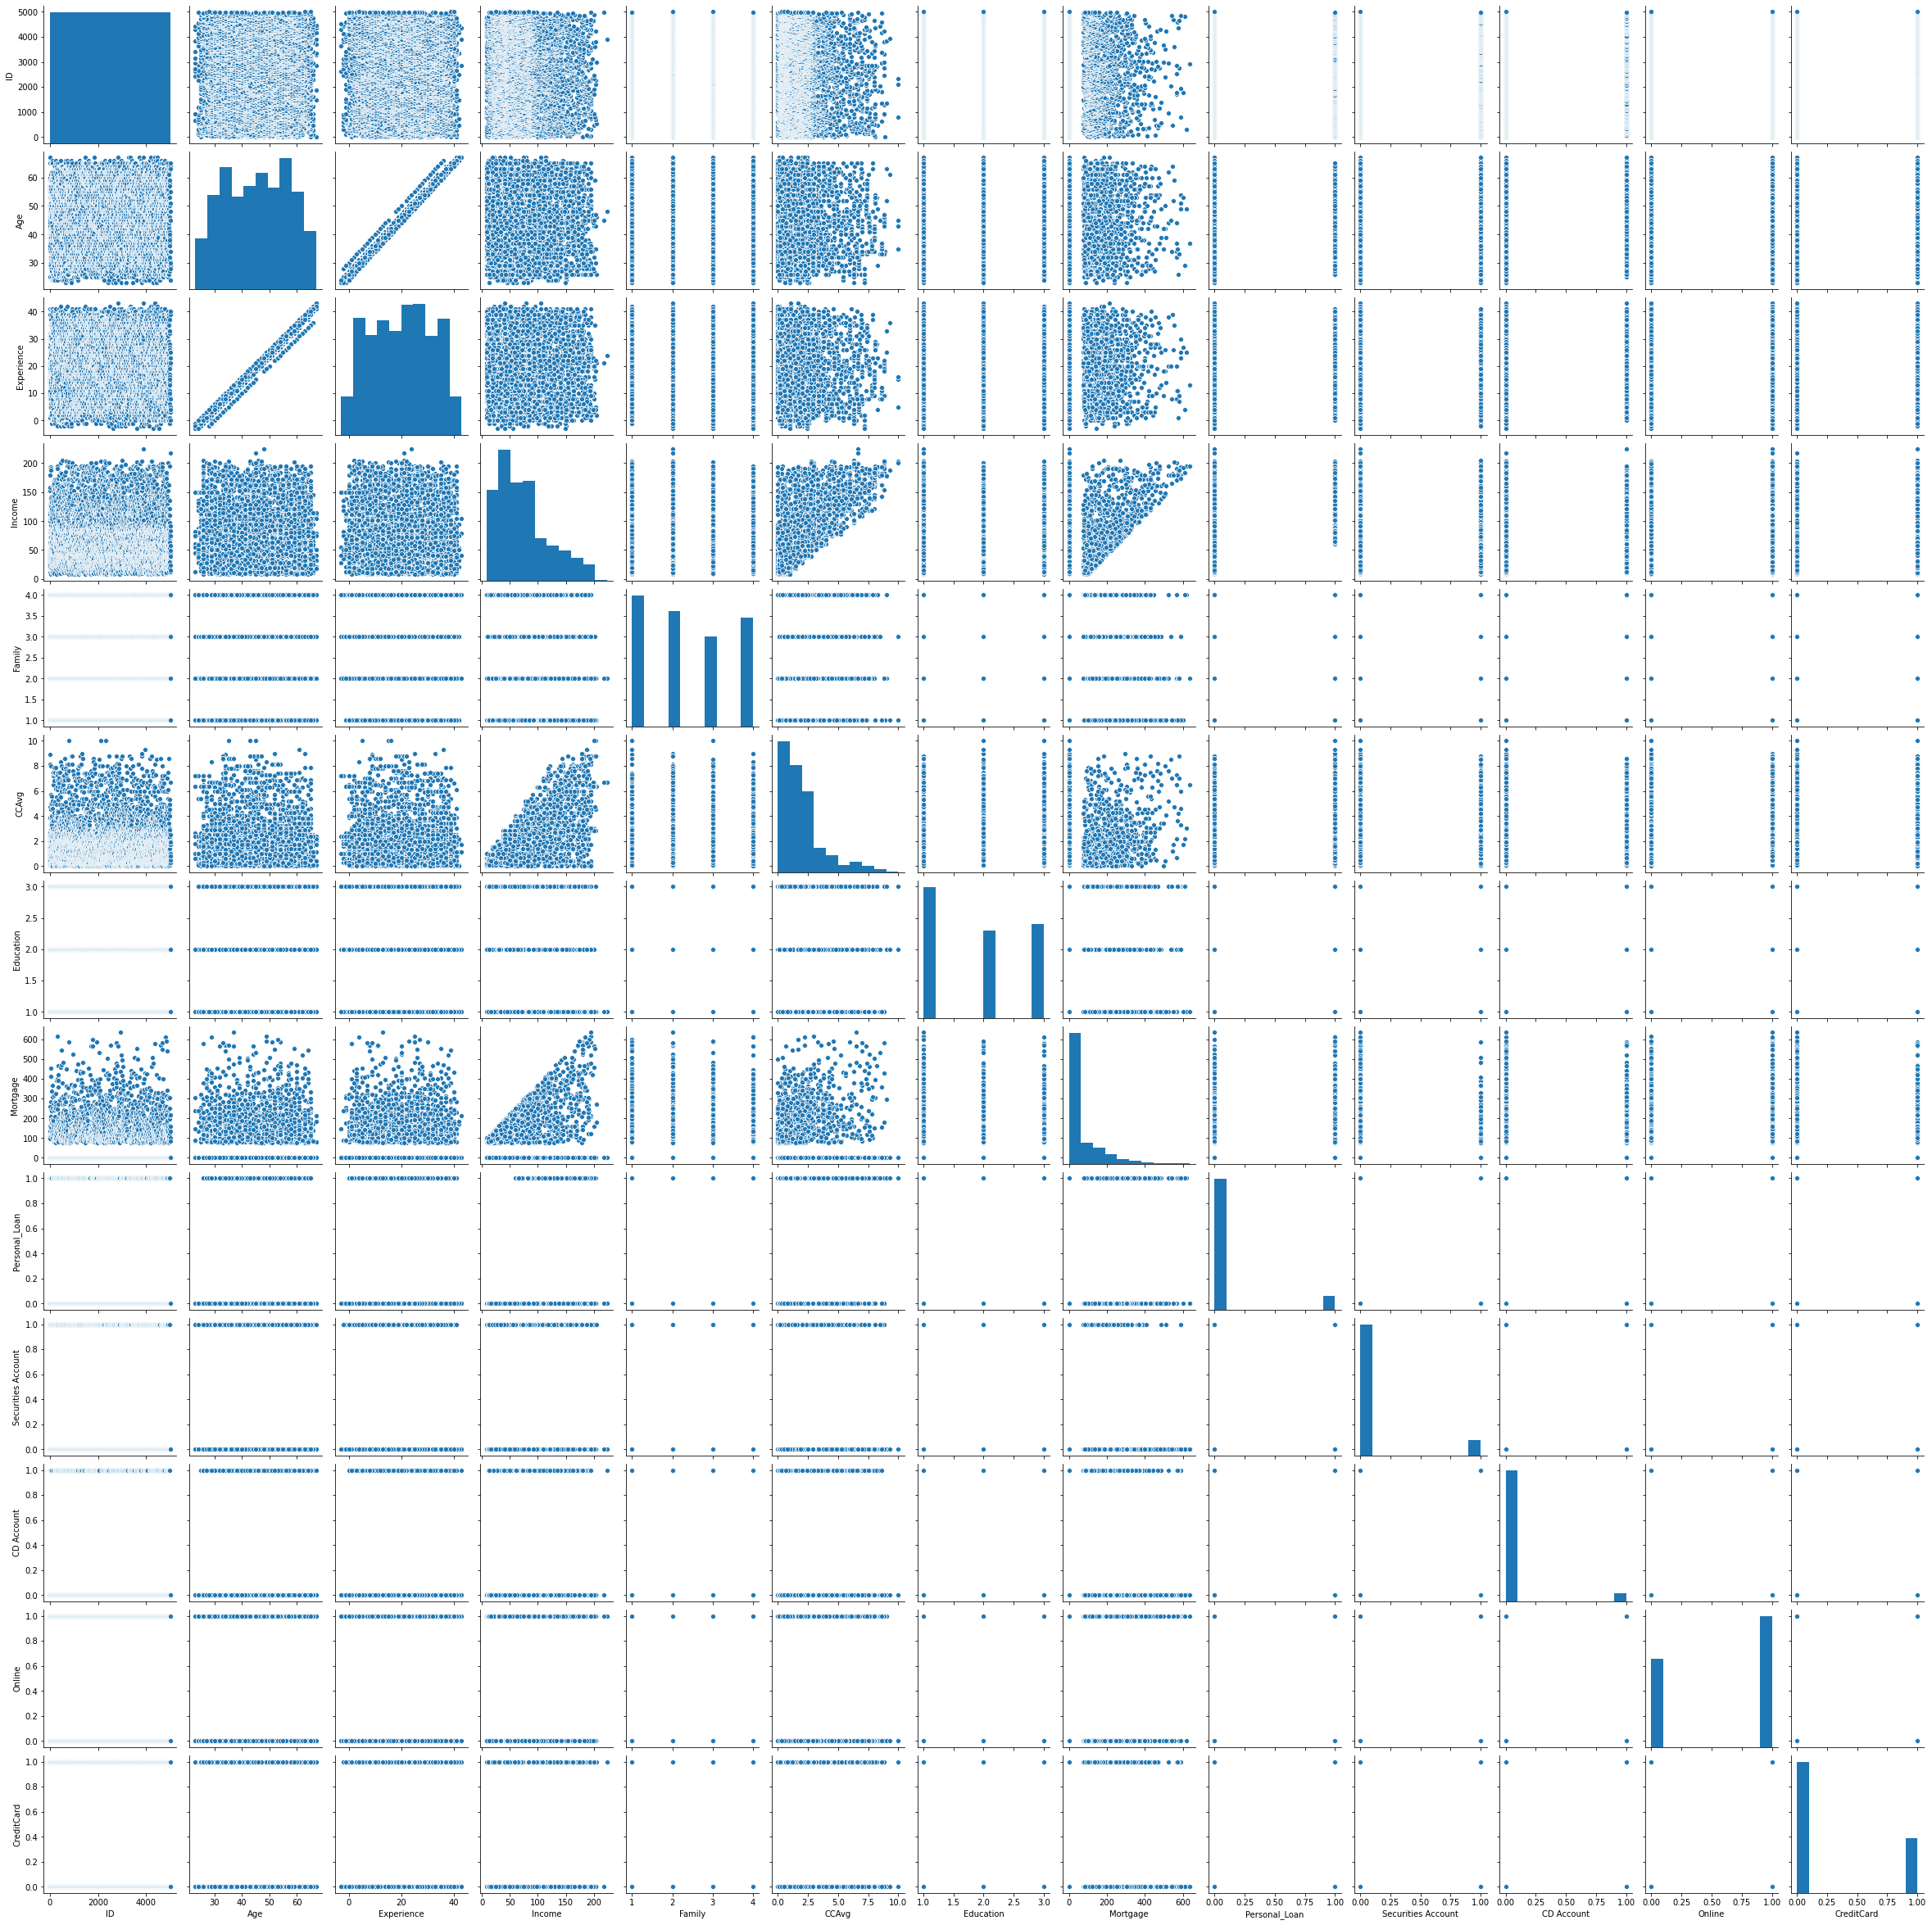

In [ ]:
# PLoting pairwise relationships of all the columns

sb.pairplot(df)

3.5 Univariate and Bivariate analysis

PLoting each column seperately 

In [ ]:
sb.set_style(style='white')   # making white grid/background

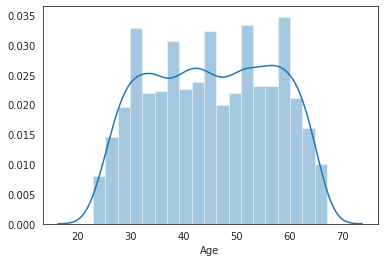

In [ ]:
sb.distplot(df.Age);

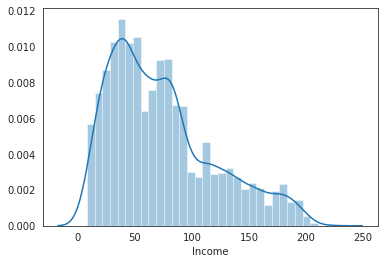

In [ ]:
sb.distplot(df.Income);

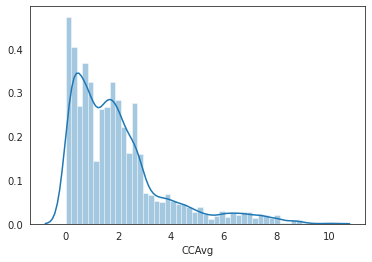

In [ ]:
sb.distplot(df.CCAvg);

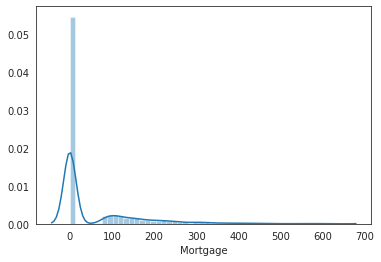

In [ ]:
sb.distplot(df.Mortgage);

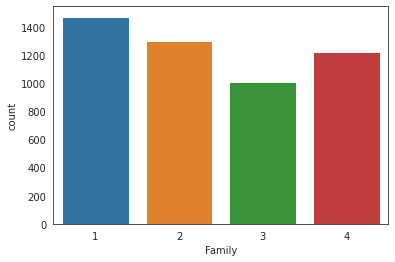

In [ ]:
sb.countplot(df.Family);

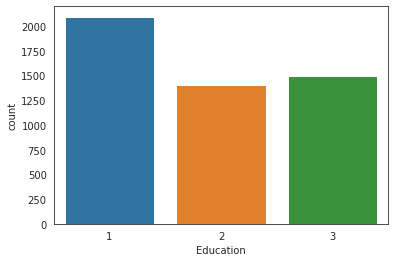

In [ ]:
sb.countplot(df.Education);

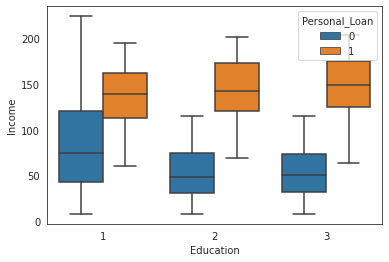

In [ ]:
# Ploting counts of observations in categorical bins

sb.boxplot(x='Education',y='Income',hue='Personal_Loan',data=df)

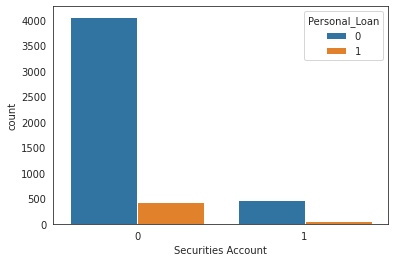

In [ ]:
# Ploting counts of observations in categorical bins

sb.countplot(x="Securities Account", data=df,hue="Personal_Loan")

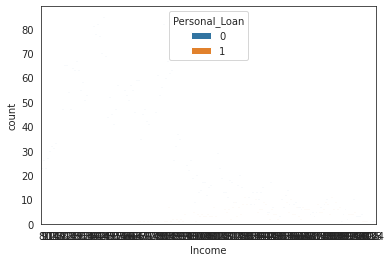

In [ ]:
# Ploting counts of observations in categorical bins

sb.countplot(x="Income", data=df,hue="Personal_Loan")


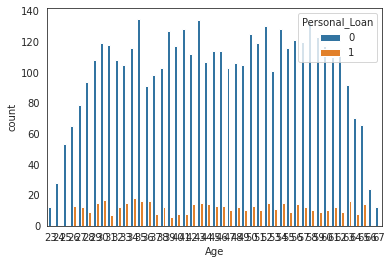

In [ ]:
# Ploting counts of observations in categorical bins

sb.countplot(x="Age", data=df,hue="Personal_Loan")


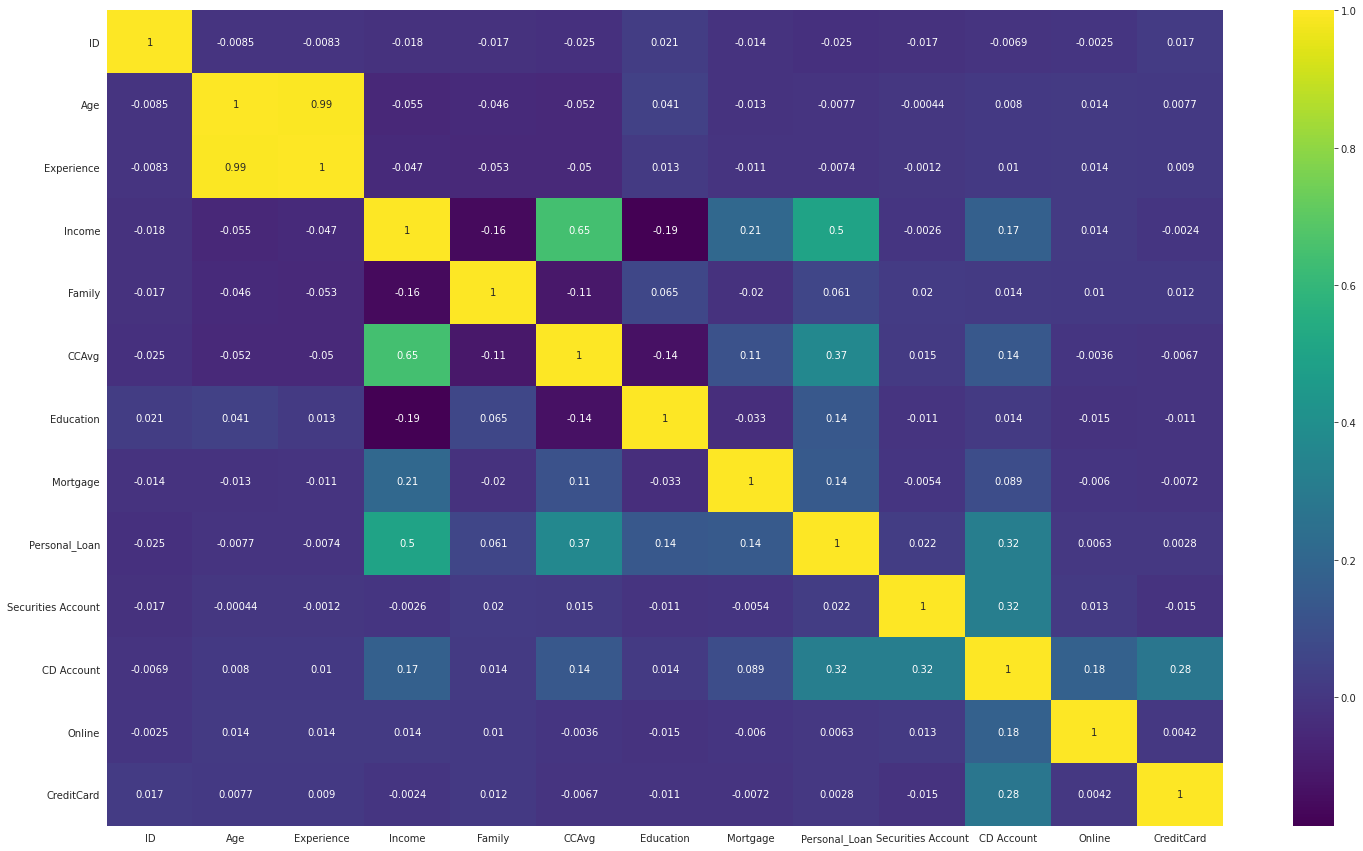

In [ ]:
# PLoting Heatmap of the current Axis

fig,ax=plt.subplots(figsize=(25,15))
sb.heatmap(df.corr(),cmap='viridis',annot=True);

Correlating different columns of data to find similarity

In [ ]:
#comparing similarity in age and expereince inorder to determine that whether it is necessary to keep experience or not
correlation= df['Age'].corr(df['Experience'])
correlation

0.9942148569683321

In [ ]:
# Since correlation of age and experience is almost equal to 1, that means we can remove experience column and our models should still work fine
df=df.drop(['Experience'],axis=1)

# 4. Performing Appropriate transformations

In [ ]:
# Dividing the dataframe in x and y for performing further operations
x=df.loc[:, df.columns != "Personal_Loan"]             
y=df["Personal_Loan"]

In [ ]:
x.shape,y.shape

((5000, 11), (5000,))

In [ ]:
#  transforming the numerical variables to have a Gaussian-like probability distribution

from sklearn.preprocessing import PowerTransformer
p = PowerTransformer(method="yeo-johnson",standardize=False)
p.fit(x["Income"].values.reshape(-1,1))
t = p.transform(x["Income"].values.reshape(-1,1))

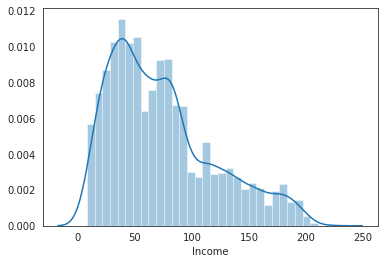

In [ ]:
sb.distplot(df.Income)

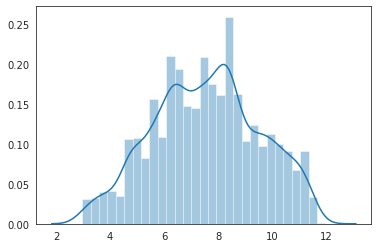

In [ ]:
sb.distplot(t)

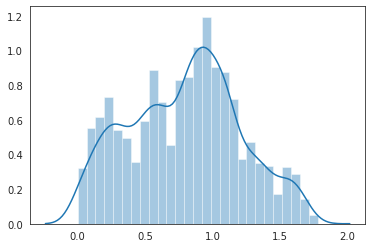

In [ ]:
# transforming the numerical variables to have a Gaussian-like probability distribution

from sklearn.preprocessing import PowerTransformer
p = PowerTransformer(method="yeo-johnson",standardize=False)
p.fit(x["CCAvg"].values.reshape(-1,1))
t = p.transform(x["CCAvg"].values.reshape(-1,1))
sb.distplot(t)

In [ ]:
x.head()    #  For checking the changes


,ID,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,49,4,1.6,1,0,1,0,0,0
1,2,45,34,3,1.5,1,0,1,0,0,0
2,3,39,11,1,1.0,1,0,0,0,0,0
3,4,35,100,1,2.7,2,0,0,0,0,0
4,5,35,45,4,1.0,2,0,0,0,0,1


# 5. Spliting Data

In [ ]:
from sklearn.model_selection import train_test_split         # importing spliting tool
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify = y, random_state=0) # data is splitted in the ratio 70:30, 70% training data, 30% testing data

In [ ]:
x_train.head()

,ID,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
3789,3790,51,24,3,0.4,1,0,0,0,1,1
758,759,64,35,1,1.5,2,0,1,0,0,0
2868,2869,52,31,4,1.8,1,0,0,0,1,1
2550,2551,32,20,1,0.5,3,102,0,0,1,0
2150,2151,62,54,1,0.8,1,0,1,0,0,1


In [ ]:
c = ['0', '1']       # Making a label for labeling the plot of confusion matrix
# 0 stands for will not take
# 1 stands for will take

# 6. Using Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression                      # Importing LogisticRegression model tool
from sklearn.metrics import precision_score, recall_score,plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve  # importing various tools required for analysis of the models

In [ ]:
log_reg = LogisticRegression(C=1.0, max_iter=1000)               # making a model with a maxium of 1000 iterations
log_reg.fit(x_train, y_train)                                    # fitting tarining data / training the model

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Training Accuracy: 95.0 %
 
Testing Accuracy: 95.0 %
 
Precision: 0.79
 
Recall: 0.6
 
[[1333   23]
 [  58   86]]
 
Note : The cell [0,0] stands for True Positive - Will not take the loan
       The cell [0,1] stands for False Positive - Might take the loan
       The cell [1,0] stands for False Negative - Might take the loan
       The cell [1,1] stands for True Negative - Will take the loan
 


Text(0.5, 1.0, 'Precision-Recall Curve for Logistic Regression')

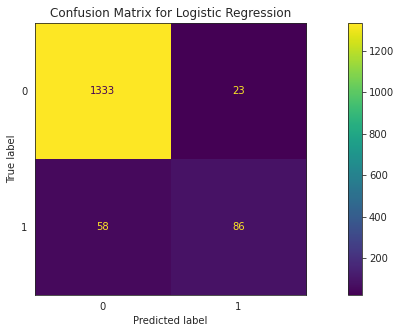

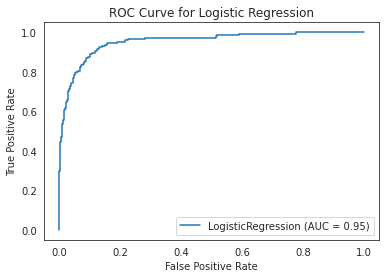

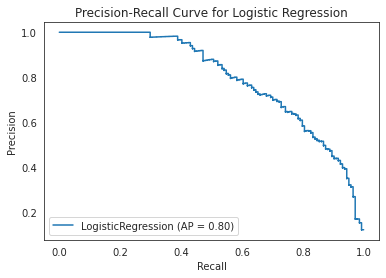

In [ ]:
train_score = log_reg.score(x_train, y_train)                    # Determining Training score of the Logistic regression model
print('Training Accuracy:', train_score.round(2)*100,'%')
print(' ')
test_score = log_reg.score(x_test, y_test)                       # Determining Testing score of the Logistic regression model
print('Testing Accuracy:', test_score.round(2)*100,'%')
print(' ')

y_pred = log_reg.predict(x_test)                                  # used for prediction / testing of the model

precision_logi = precision_score(y_test, y_pred).round(2)         # finding precision score of the model
print('Precision:', precision_logi)
print(' ')
recall_logi = recall_score(y_test, y_pred).round(2)               # Finding recall score of the model
print('Recall:', recall_logi)
print(' ')

from sklearn import metrics
a = metrics.confusion_matrix(y_test, y_pred)                      # Printing Confusion matrix
print(a)

plot_confusion_matrix(log_reg, x_test, y_test, display_labels=c, values_format = 'd')  # Plotting confusion matrix
plt.gcf().set_size_inches(15,5)                                  # Resizing the confusion matrix plot
plt.title('Confusion Matrix for Logistic Regression')
print(' ')
print('Note : The cell [0,0] stands for True Positive - Will not take the loan')
print('       The cell [0,1] stands for False Positive - Might take the loan')
print('       The cell [1,0] stands for False Negative - Might take the loan')
print('       The cell [1,1] stands for True Negative - Will take the loan')
print(' ')

plot_roc_curve(log_reg, x_test, y_test)                              # PLoting ROC curve
plt.title('ROC Curve for Logistic Regression')

plot_precision_recall_curve(log_reg, x_test, y_test)                 # Ploting precision-recall_trade off curve
plt.title('Precision-Recall Curve for Logistic Regression')

# 8. Building various algorithms to compare their performances

# 8.1 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier      # Importing Decision tree classifier's library


In [ ]:
dtc = DecisionTreeClassifier()                      # Declaring classifier as dfc
dtc.fit(x_train, y_train)                           # Training the classifier using training set of data
y_pred_dt=dtc.predict(x_test)                       # Prdeicting / testing the data

Training Accuracy: 100.0 %
 
Testing Accuracy: 98.0 %
 
Precision: 0.88
 
Recall: 0.9
 
[[1338   18]
 [  15  129]]


Text(0.5, 1.0, 'Precision-Recall Decision Tree Classifier')

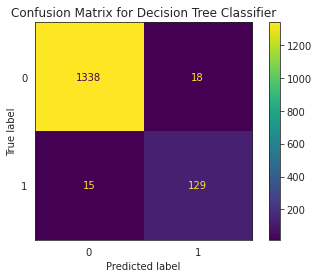

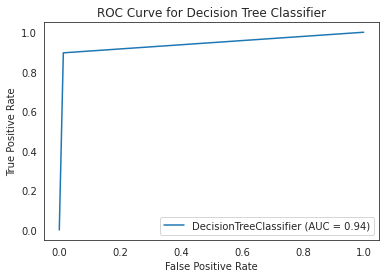

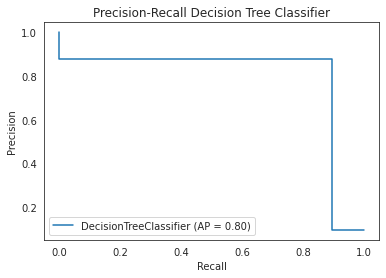

In [ ]:
train_score = dtc.score(x_train, y_train)
print('Training Accuracy:', train_score.round(2)*100,'%')
print(' ')
test_score = dtc.score(x_test, y_test)
print('Testing Accuracy:', test_score.round(2)*100,'%')
print(' ')

precision_dt = precision_score(y_test, y_pred_dt).round(2)
print('Precision:', precision_dt)
print(' ')
recall_dt = recall_score(y_test, y_pred_dt).round(2)
print('Recall:', recall_dt)
print(' ')

from sklearn import metrics
b = metrics.confusion_matrix(y_test, y_pred_dt)                      # Printing Confusion matrix
print(b)



plot_confusion_matrix(dtc, x_test, y_test, display_labels=c, values_format = 'd')
plt.title('Confusion Matrix for Decision Tree Classifier')

plot_roc_curve(dtc, x_test, y_test)
plt.title('ROC Curve for Decision Tree Classifier')

plot_precision_recall_curve(dtc, x_test, y_test)
plt.title('Precision-Recall Decision Tree Classifier')

# 8.2 Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier                                        # Importing Random forest Classifier's library
rfc = RandomForestClassifier(n_estimators=100, max_depth=7,n_jobs=-1, random_state=1 )     # Declaring classifier as rfc
rfc.fit(x_train, y_train)                                                                  # Traing the classifier using training sets of data

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_rf = rfc.predict(x_test)                        # Predicting / testing the classifier

Training Accuracy =  99.0 %
 
Testing Accuracy: 98.0 %
 
Precision: 0.98
 
Recall: 0.85
 
The confusion matrix is :  [[1353    3]
 [  21  123]]
 


Text(0.5, 1.0, 'Precision-Recall Random Forest Classifier')

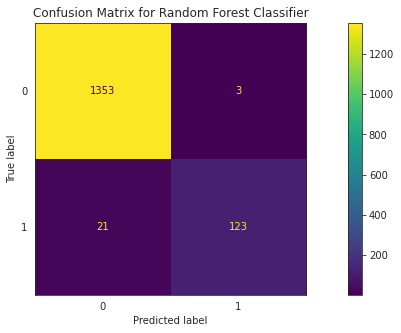

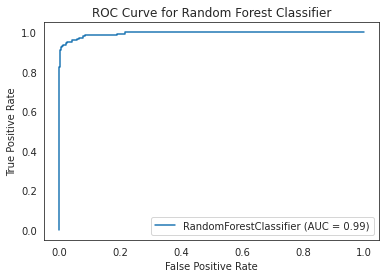

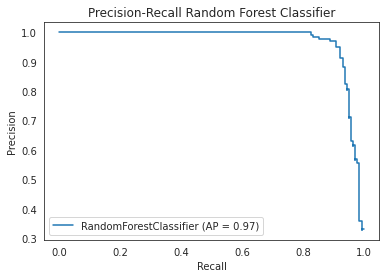

In [ ]:
train_score_rf = rfc.score(x_train, y_train)
print('Training Accuracy = ', train_score_rf.round(2)*100,'%')
print(' ')
test_score_rf = rfc.score(x_test, y_test)
print('Testing Accuracy:', test_score_rf.round(2)*100,'%')
print(' ')


precision_rf = precision_score(y_test, y_pred_rf).round(2)
print('Precision:', precision_rf)
print(' ')
recall_rf = recall_score(y_test, y_pred_rf).round(2)
print('Recall:', recall_rf)
print(' ')

from sklearn import metrics
e = metrics.confusion_matrix(y_test, y_pred_rf)                      # Printing Confusion matrix
print('The confusion matrix is : ',e)


plot_confusion_matrix(rfc, x_test, y_test, display_labels=c, values_format = 'd')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.gcf().set_size_inches(15,5)
print(' ')

plot_roc_curve(rfc, x_test, y_test)
plt.title('ROC Curve for Random Forest Classifier')

plot_precision_recall_curve(rfc, x_test, y_test)
plt.title('Precision-Recall Random Forest Classifier')

# 8.3 Karnot Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier              # Importing Karnot Nearest Neighbour classifier's library


In [ ]:
k= KNeighborsClassifier(n_neighbors= 15,weights ='uniform',metric='euclidean')   # declaring KNN classifier as k
k.fit(x_train, y_train)                                                          # Training the classifier using traing sets of data


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [ ]:
y_pred_kn=k.predict(x_test)                                                   # Predicting / testing the classifier

Training Accuracy: 91.0 %
 
Testing Accuracy: 90.0 %
 
Precision: 0.31
 
Recall: 0.03
 
[[1345   11]
 [ 139    5]]


Text(0.5, 1.0, 'Precision-Recall Decision Tree Classifier')

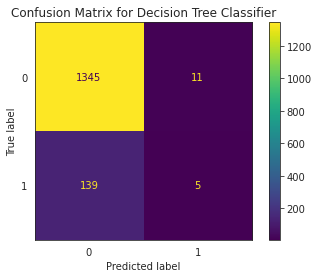

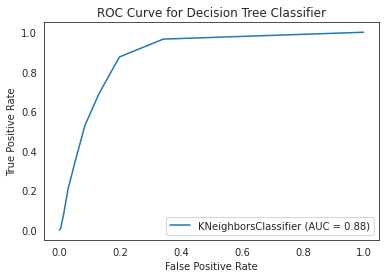

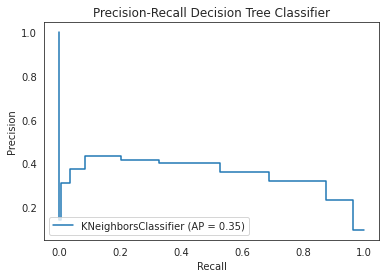

In [ ]:
train_score = k.score(x_train, y_train)
print('Training Accuracy:', train_score.round(2)*100,'%')
print(' ')
test_score = k.score(x_test, y_test)
print('Testing Accuracy:', test_score.round(2)*100,'%')
print(' ')

precision_kn = precision_score(y_test, y_pred_kn).round(2)
print('Precision:', precision_kn)
print(' ')
recall_kn = recall_score(y_test, y_pred_kn).round(2)
print('Recall:', recall_kn)
print(' ')

from sklearn import metrics
f = metrics.confusion_matrix(y_test, y_pred_kn)                      # Printing Confusion matrix
print(f)


plot_confusion_matrix(k, x_test, y_test, display_labels=c, values_format = 'd')
plt.title('Confusion Matrix for Decision Tree Classifier')

plot_roc_curve(k, x_test, y_test)
plt.title('ROC Curve for Decision Tree Classifier')

plot_precision_recall_curve(k, x_test, y_test)
plt.title('Precision-Recall Decision Tree Classifier')

# 8.4 Logistic Regression Model fitting and predicting without sklearn library

In [ ]:
class LogRegression:                                                                                    # Making class of the classifier model
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):                    # Defining the intiating function 
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
    
    def __add_intercept(self, X):                                                                       # Making a intercept recorder which will store intercept values for each itteration
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):                                                                             # Sigmoid function
        return 1 / (1 + np.exp(-z))                                                                     # g = 1 / 1 + e^(-x)

    def __loss(self, h, y):                                                                             # Loss function   
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()                                        # h = g(theta)           
                                                                                                        # y = (1 / mean) * (-y * log(h) - (1 - y) * log(1 - h))                            
    
    def fit(self, X, y):                                                                                # Fitting  / training the model
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if(i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
    
    def predict_prob(self, X):                                                                        
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):                                                                       # Predicting / Testing the model
        return self.predict_prob(X) >= threshold



    def score(self, X, y, sample_weight=None):                                                          # making scoring function to find accuracy of the model
        from sklearn.metrics import accuracy_score
        return accuracy_score(y, self.predict(X, 0.5), sample_weight=sample_weight)


In [ ]:
log_reg = LogRegression(lr=0.1, num_iter=300000)               # making a model with a maxium of 1000 iterations
log_reg.fit(x_train, y_train)                                  # Trainig the model

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


loss: inf 	
loss: inf 	
loss: inf 	
loss: inf 	
loss: inf 	
loss: inf 	
loss: inf 	
loss: inf 	
loss: inf 	
loss: inf 	
loss: inf 	
loss: inf 	
loss: inf 	
loss: inf 	
loss: inf 	
loss: inf 	
loss: inf 	
loss: inf 	
loss: inf 	
loss: inf 	
loss: inf 	
loss: inf 	
loss: inf 	
loss: inf 	
loss: inf 	
loss: inf 	
loss: inf 	
loss: inf 	
loss: inf 	
loss: inf 	


In [ ]:
y_pred_tri = log_reg.predict(x_test, 0.5)                         # Testing the model

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


In [ ]:
from sklearn import metrics                                       # Using sklearn to import metrices inorder to obtain confusion matrix
a = metrics.confusion_matrix(y_test, y_pred_tri)                      # Printing Confusion matrix


# In confusion matrix : 
# (0,0) = True positive
# (0,1) = False Positive
# (1,0) = False Negative
# (1,1) = True Negative

preci = a[0,0]/(a[0,1] + a[0,0])                                  # Precision = true positive / (true positive + false positive)


recaal = a[0,0]/(a[0,0] + a[1,0])                                 # Recall = true positive / (true positive + false negative)

In [ ]:
train_score = log_reg.score(x_train, y_train)                    # Determining Training score of the Logistic regression model
print('Training Accuracy:', train_score.round(2)*100,'%')
print(' ')
test_score = log_reg.score(x_test, y_test)                       # Determining Testing score of the Logistic regression model
print('Testing Accuracy:', test_score.round(2)*100,'%')
print(' ')
print('Precision:', preci)
print(' ')            
print('Recall:', recaal)
print(' ')


Training Accuracy: 90.0 %
 
Testing Accuracy: 90.0 %
 
Precision: 0.9845132743362832
 
Recall: 0.9131326949384405
 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


# 9. Conclusion

After comparing the accuracy, precisions, recall values and confusion matrix, I came to a conclusion that Random Forest model is best suitable since it has highest testing and training accuracy as well as highest precision.

Sklearn model does have second best accuracies, but its precision value is lesser than that of Random Forest

Training accuracy of Decision Tree model is 100%, but testing aaccuracy is lower which means that the model is overfitted.

KNN model has the highest recall value and its precision and other values are also not the best.

Logistic Regression model made without the help of sklearn library does have high precision but still lacks in testing and traing accuracy.

# Hence with the above observations I conclude that Random Forest Model is best suited for this problem.





Now after concluding the best model lets once again see its performance :

Training Accuracy =  99.0 %
 
Testing Accuracy: 98.0 %
 
Precision: 0.98
 
Recall: 0.85

The confusion matrix is :  [[1353   3]
                           [  21   123]]

                           This means 1353 values were predicted no and were actually no
                           23 values were predicted yes but were actually no
                           21 values were predicted no but were actually yes
                           and 123 values were predicted yes and were actually yes

So from this we can concur that 123 people were predicted perfectly and were sure to take a loan, and 1353 people were sure to not take loan.

21 people were predicted to not take loan but actually they did take it 
and 3 people were predicted to take loan but did not take it.

This means the details of the latter 2 group of people namely 21 people and 3 people have bank details that suggest otherwise of there choice and hence the bank should use their selective marketing on this 21 + 3 + 123 people, i.e. 147 people outoff 2000. 


# This means bank has to do selective marketing for loan with atleast 7.3% of their consumers that are data that suggest true negative, false positive and false negative.


